In [96]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from typing import Dict
import os

# Baselines

In [97]:
random_layer = nn.Linear(512, 512)

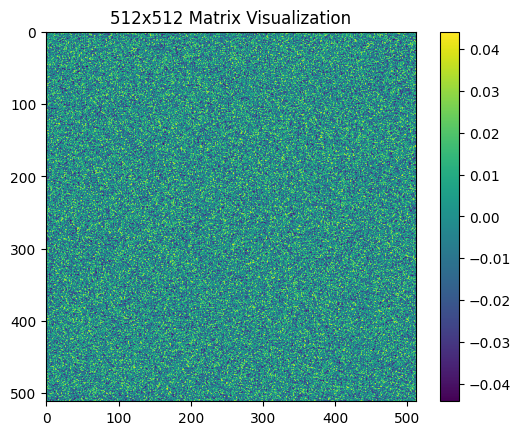

In [98]:
# Generate a 512x512 matrix with random values for demonstration purposes
matrix = random_layer.weight.detach().numpy()

# Use imshow to visualize the matrix
plt.imshow(matrix, cmap='viridis')  # You can change the colormap (cmap) as needed
plt.colorbar()  # Display the color scale
plt.title('512x512 Matrix Visualization')
plt.show()


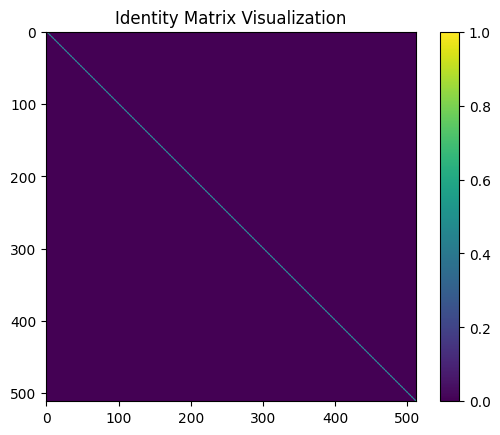

In [99]:
identity_lienar = nn.Linear(512, 512)
identity_lienar.weight.data = torch.eye(512)
identity_matrix = identity_lienar.weight.detach().numpy()
plt.imshow(identity_matrix, cmap='viridis')
plt.colorbar()
plt.title('Identity Matrix Visualization') 
plt.show()

In [131]:
# Function to Plot 5 Matrixes provided as input
def plot_matrixes(figure_title:str, layers:Dict[str, Dict[str, np.ndarray]], figsize=(20, 13)):
    fig, axs = plt.subplots(len(layers), 5, figsize=figsize)
    for j, (layer, matrix) in enumerate(layers.items()):
        for i, (title, matrix) in enumerate(matrix.items()):
            im = axs[j][i].imshow(matrix, cmap='viridis')
            axs[j][i].set_title(layer + ' ' + title)
    
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    fig.suptitle(figure_title, fontsize=16, fontweight='bold')
    return fig

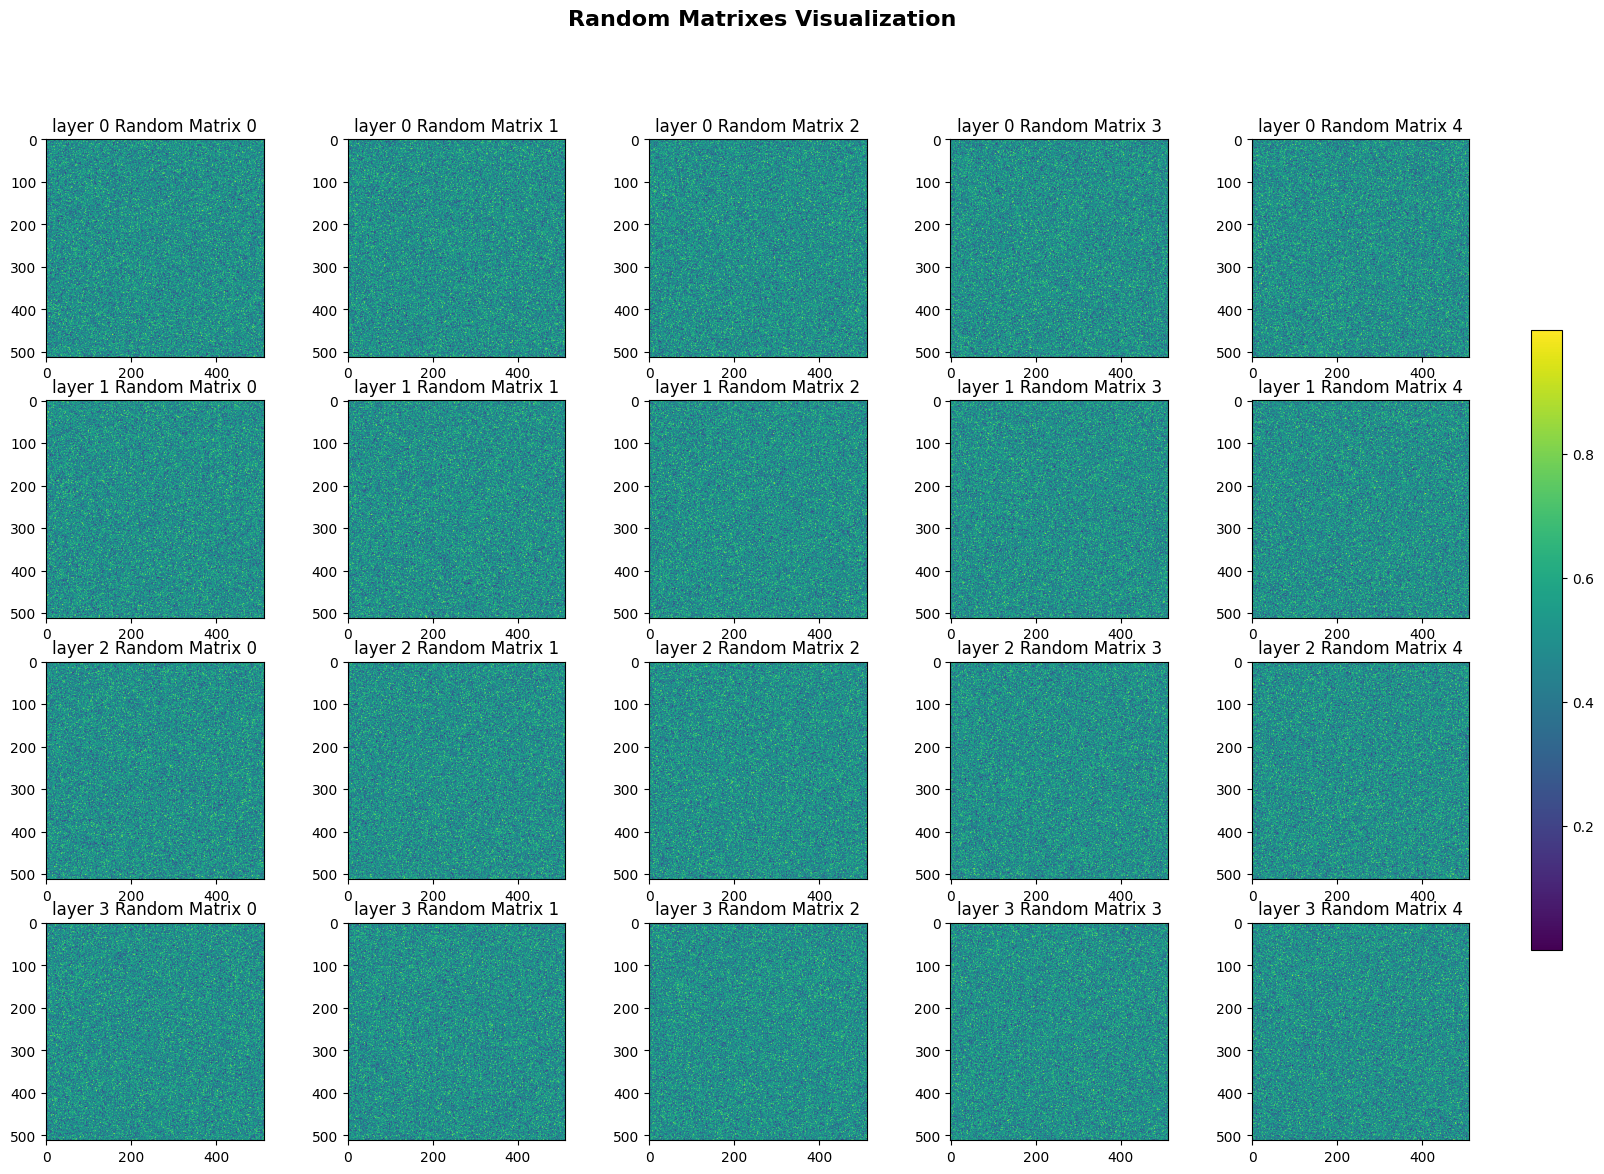

In [132]:
# Create random matrixes
random_matrixes = {f"layer {j}":{f'Random Matrix {i}': np.random.rand(512, 512) for i in range(5)} for j in range (4)}
figure_title = 'Random Matrixes Visualization'
figure = plot_matrixes(figure_title, random_matrixes)

In [141]:
def get_all_worker_paths(base_path:str) -> Dict[str, str]:
    return {f"Worker {i}": os.path.join(base_path, str(i), "model") for i in range(5)}

In [146]:
def load_all_layers_paths(base_path:str, n_layers:int) -> Dict[str, Dict[str, str]]:
    return {f"Layer {i}": get_all_worker_paths(os.path.join(base_path, str(i))) for i in range(1,n_layers +1)} 

# Net2DeeperNet Deth 2 Experiments

## MiniHack Room Random

In [147]:
from stable_baselines3.common.save_util import load_from_zip_file

In [148]:
base_path = "fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)"
figure_title = 'Random Matrixes Visualization'

In [149]:
path_dict = load_all_layers_paths(base_path, 2)
path_dict

{'Layer 1': {'Worker 0': 'fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)/1/0/model',
  'Worker 1': 'fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)/1/1/model',
  'Worker 2': 'fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)/1/2/model',
  'Worker 3': 'fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)/1/3/model',
  'Worker 4': 'fehring_growing_nn_new_seeded/net2deeper_budget200_final/4/(32, 0.2, None, 0.0005309372850206717, 0.95, 0.00020422562780736536, 0.5, 10, 2048, False, 0.5, 512, 1, 512, 2)/1/4/model'}

In [151]:
for layer, worker_paths in path_dict.items():
    for worker, path in worker_paths.items():
        _, params, _ = load_from_zip_file(path)
        print(f"Layer {layer} Worker {worker} Params: {params}")
        

ModuleNotFoundError: No module named 'utils.networks.feature_extractor'

In [82]:
params["policy"].keys()

odict_keys(['features_extractor.extractors.chars.1.weight', 'features_extractor.extractors.chars.1.bias', 'features_extractor.downscaling.0.weight', 'features_extractor.downscaling.0.bias', 'features_extractor.linear_layers.sequential_container.linear_0.weight', 'features_extractor.linear_layers.sequential_container.linear_0.bias', 'features_extractor.linear_layers.sequential_container.linear_1.weight', 'features_extractor.linear_layers.sequential_container.linear_1.bias', 'pi_features_extractor.extractors.chars.1.weight', 'pi_features_extractor.extractors.chars.1.bias', 'pi_features_extractor.downscaling.0.weight', 'pi_features_extractor.downscaling.0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_0.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_0.bias', 'pi_features_extractor.linear_layers.sequential_container.linear_1.weight', 'pi_features_extractor.linear_layers.sequential_container.linear_1.bias', 'vf_features_extractor.extractor

In [83]:
weigths = params["policy"]["features_extractor.linear_layers.sequential_container.linear_1.weight"]

Text(0.5, 1.0, 'Identity Matrix Visualization')

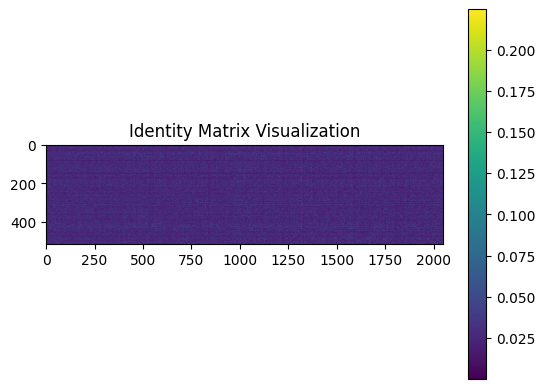

In [84]:
np_weigths = weigths.detach().numpy()
np_weigths = np.abs(np_weigths)
plt.imshow(np_weigths, cmap='viridis')
plt.colorbar()
plt.title('Identity Matrix Visualization')


In [80]:
np_weigths.shape

(512, 1024)